In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense

In [15]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()

In [16]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

#introducing noise
x_train_noisy = x_train + 0.2 * np.random.normal(0,1,size=x_train.shape)
x_test_noisy = x_test + 0.2 * np.random.normal(0,1,size=x_test.shape)

#clipping values
x_train_noisy = tf.clip_by_value(x_train_noisy, 0. , 1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, 0. , 1.)

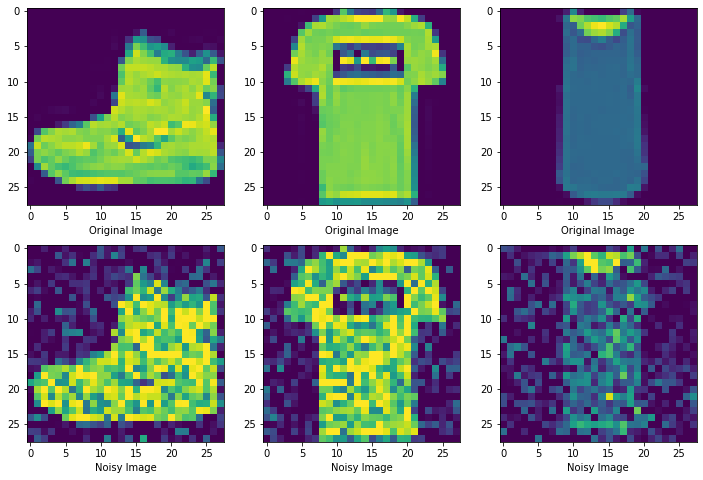

In [19]:
plt.figure(figsize=(12,8))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i])
    plt.xlabel("Original Image")
    plt.subplot(2,3,i+3+1)
    plt.imshow(x_train_noisy[i])
    plt.xlabel("Noisy Image")

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(784,activation='sigmoid'),
    keras.layers.Reshape((28,28))
])

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [29]:
predict = model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy,x_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.2855 - val_loss: 0.2836
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2811 - val_loss: 0.2826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2807 - val_loss: 0.2822
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2802 - val_loss: 0.2822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.2792 - val_loss: 0.2815
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.2797 - val_loss: 0.2813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2795 - val_loss: 0.2816
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2784 - val_loss: 0.2811
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2781 - val_loss: 0.2810
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2787 - val_loss: 0.2809


In [32]:
output = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


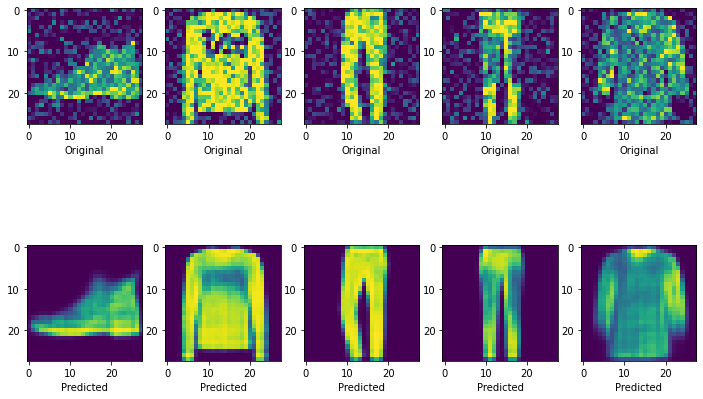

In [38]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(2,5, i+1)
    plt.imshow(x_test_noisy[i])
    plt.xlabel("Original")
    plt.subplot(2,5,i+5+1)
    plt.imshow(output[i])
    plt.xlabel("Predicted")


In [2]:
# import cv2
# img = cv2.imread('car.jpg')
# #img.reshape((28,28))
# plt.imshow(img)